# Introducción

Desarrollo de ejemplos básicos de manipulación de imagenes con la libreria PIL y mediante operaciones en la imagen como matríz.

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

## 1. Lectura de la imagen

In [2]:
# Ubicación y nombre de la imagen
path = 'docs/'
file = 'ardu_shield.jpg'

# Objeto Image de la imagen en 'file_path'
im = Image.open(path + file)

type(im)

PIL.JpegImagePlugin.JpegImageFile

## 2. Atributos de la imagen

In [3]:
print('Formato de la imagen:', im.format)
print('Formato de píxel:    ', im.mode)
print('Tamaño (ancho, alto):', im.size)

Formato de la imagen: JPEG
Formato de píxel:     RGB
Tamaño (ancho, alto): (4624, 2604)


## 3. Gráfica de la imagen

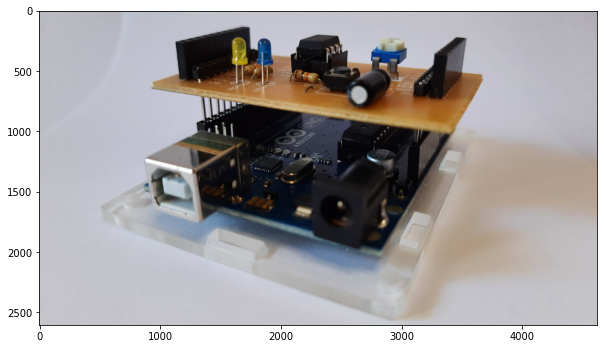

In [4]:
plt.figure(figsize=(10,10))
plt.imshow(im)
plt.show()

## 4. Modificación de la imagen

### 4.1. Cortar

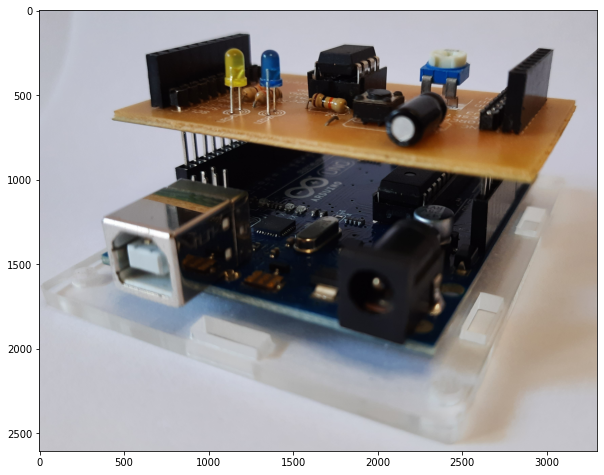

In [5]:
# (left, upper, right, lower)
rectangle = (500,0, 3800, 2604)

im_crop = im.crop(rectangle)

plt.figure(figsize=(10,10))
plt.imshow(im_crop)
plt.show()

### 4.2. Cambiar tamaño

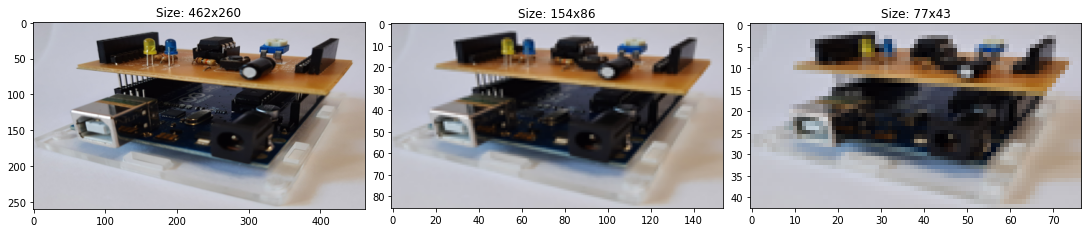

In [6]:
# Lista de los tamaños de la nueva imagen
size = [(int(im.width/10), int(im.height/10)), 
        (int(im.width/30), int(im.height/30)), 
        (int(im.width/60), int(im.height/60))]

fig, axs = plt.subplots(1, 3, constrained_layout=True, figsize=(15,15))

for i in range(0, 3):
    
    im_resized = im_crop.resize(size[i])
    
    axs[i].set_title('Size: ' + str(size[i][0]) + 'x' + str(size[i][1]))
    axs[i].imshow(im_resized)

plt.show()

### 4.3. Transformación de canal

Se manipulan y extraen los canales de la imagen a aprtir de los métodos disponibles con PIL. Más adelante se realiza mediante la operación de la imagen como matríz.

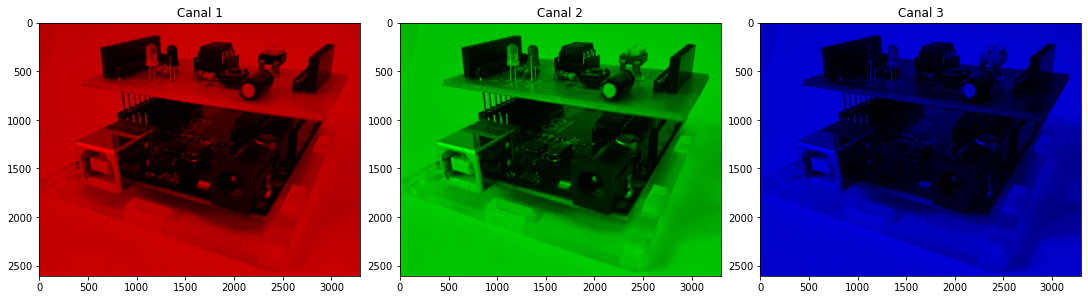

In [7]:
# Make transform matrix, to multiply R by 1.1, G by 0.9 and leave B unchanged
# newRed   = 1.1*oldRed  +  0*oldGreen    +  0*oldBlue  + constant
# newGreen = 0*oldRed    +  0.9*OldGreen  +  0*OldBlue  + constant
# newBlue  = 0*oldRed    +  0*OldGreen    +  1*OldBlue  + constant

# Matríz para extraer los canales RGB por separado de la imagen
#Matrix = ( r,   0,  0, 0, 
#           0,   g,  0, 0, 
#           0,   0,  b, 0)

red_channel = ( 1,   0,  0, 0, 
                0,   0,  0, 0, 
                0,   0,  0, 0 )

green_channel = ( 0,   0,  0, 0, 
                  0,   1,  0, 0, 
                  0,   0,  0, 0 )

blue_channel = ( 0,   0,  0, 0, 
                 0,   0,  0, 0, 
                 0,   0,  1, 0 )

matrix = [red_channel, green_channel, blue_channel]


fig, axs = plt.subplots(1, 3, constrained_layout=True, figsize=(15,15))

for i in range(0, 3):
    
    im_transform = im_crop.convert("RGB", matrix[i])
    
    axs[i].set_title('Canal ' + str(i+1))
    axs[i].imshow(im_transform)

plt.show()

### 4.4. Cuantificación

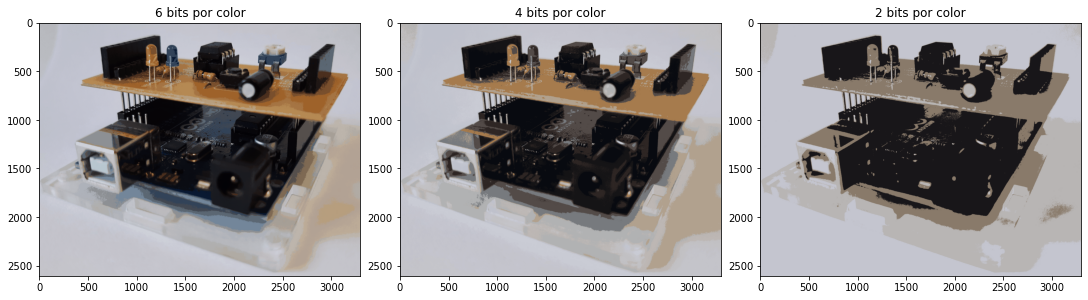

In [8]:
# Cantidad de bits por color
bits = [6, 4, 2]

fig, axs = plt.subplots(1, 3, constrained_layout=True, figsize=(15,15))

for i in range(0, 3):
    
    im_quantize = im_crop.quantize(2**bits[i])
    
    axs[i].set_title(str(bits[i]) + ' bits por color')
    axs[i].imshow(im_quantize)

plt.show()

### 4.5. Rotar

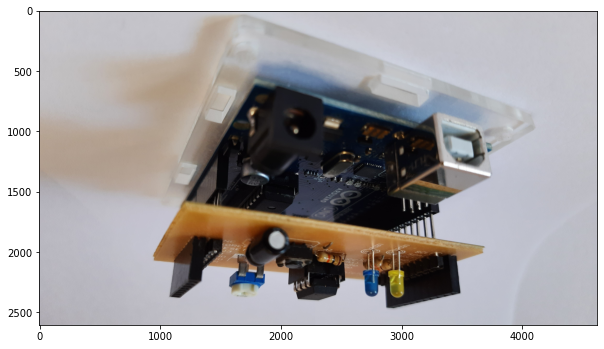

In [9]:
# Se rota la imagen 180°
im_rotated = im.rotate(180)

plt.figure(figsize=(10,10))
plt.imshow(im_rotated)
plt.show()

## 5. Guardar la imagen

In [10]:
new_file_name = 'ardu_resized.jpg'

im_resized.save(path + new_file_name)

## 6. Análisis RGB por pixel

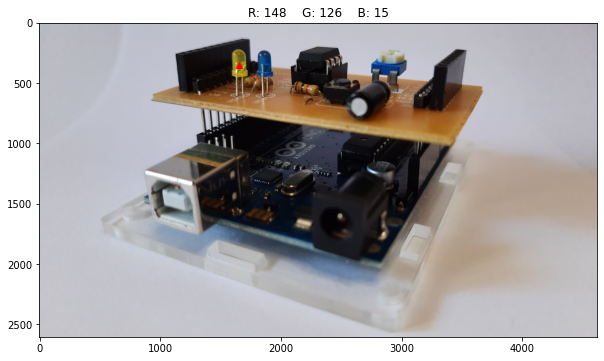

In [11]:
# Valores RGB del píxel en la posición (x, y)
r, g, b = im.getpixel((1650, 350))

plt.figure(figsize=(10,10))
plt.imshow(im)
plt.scatter(1650, 350, marker='^', color='red')
plt.title('R: ' + str(r) + '    G: ' + str(g) + '    B: ' + str(b))
plt.show()

* Obsérvese que el punto ubicado está en el LED (bombillo) de color amarillo. Esto corresponde con los valores arrojados por el método ***getpixel()*** donde el canal azul tiene una magnitud pequeña y el rojo y verde valores muy similares..

### 6.1. Muestreo horizontal

Ahora se recorre una linea horizontal y se grafican los valores RGB correspondientes para cada píxel sobre la linea elegida.

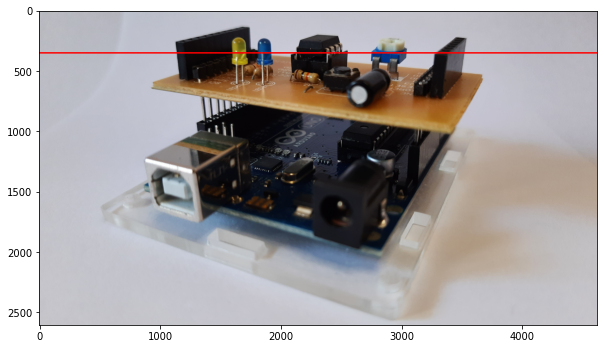

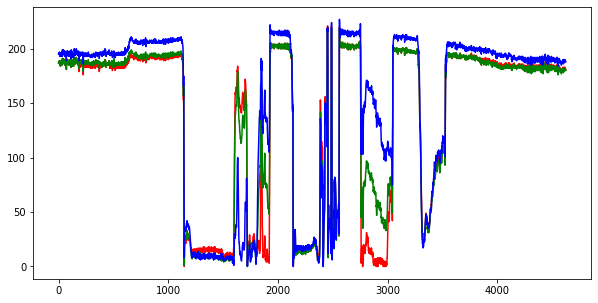

In [12]:
# Píxeles de la coordenada X
x_ = [i for i in range(0,4624)]

# Línea de muestreo
y_ = [350]*4624

# Valores RGB para la línea analizada
red = []
green = []
blue = []

# Barrido de línea horizontal
for i in range(0, len(x_)):
    r, g, b = im.getpixel((i, y_[0]))
    
    red.append(r)
    green.append(g)
    blue.append(b)


plt.figure(figsize=(10,15))
plt.imshow(im)
plt.plot(x_, y_, color='red')
plt.show()

plt.figure(figsize=(10,5))
plt.plot(x_, red, color='red')
plt.plot(x_, green, color='green')
plt.plot(x_, blue, color='blue')
plt.show()

## 7. Imagen como matríz

La imagen leida anteriormente con la libreria PIL, se convierte en un array de 3-dimensiones de la forma (alto, ancho, canales)

In [13]:
# Convertir en una matriz Numpy de floats
im_matrix = np.array(im_crop).astype('uint8')

In [14]:
im_matrix.shape

(2604, 3300, 3)

In [15]:
# Valores del canal rojo
red_values = im_matrix[..., 0]

# Valores del canal verde
green_values = im_matrix[..., 1]

# Valores del canal azul
blue_values = im_matrix[..., 2]

print('Valores del canal rojo\n')
print(red_values)

Valores del canal rojo

[[182 182 184 ... 188 186 185]
 [180 181 183 ... 188 187 187]
 [181 182 183 ... 189 189 188]
 ...
 [196 196 196 ... 197 196 195]
 [197 196 196 ... 196 195 195]
 [196 195 195 ... 196 197 197]]


## 8. Manipulación de la imagen con matrices

Se extrae la información de cada canal de la imagen operando la imagen con una matríz correspondiente.

### 8.1. Canal rojo

Para extraer el canal rojo, se multiplica la matríz de la imagen por la unidad (1) al valor deseado y el resto los valores nulos (0).

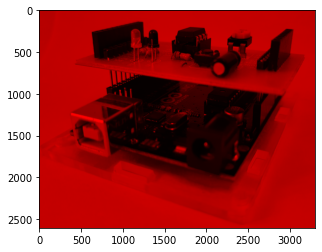

In [16]:
# [R]   [R, G, B] -> Componentes RGB del canal R
# [G] = [R, G, B] -> Componentes RGB del canal G
# [B]   [R, G, B] -> Componentes RGB del canal B
matrix = np.array([[1, 0, 0],
                   [0, 0, 0],
                   [0, 0, 0]])

img_red_channel = np.matmul(im_matrix.reshape((-1,3)), matrix.T).reshape(im_matrix.shape)

plt.imshow(img_red_channel)
plt.show()

### 8.2. Escala de grises

Si se aplica el promedo de todos los píxeles, esto general la imagen en escala de grises.

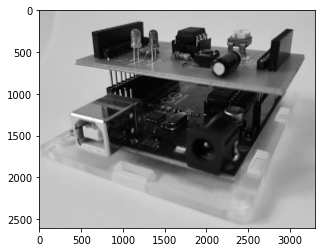

In [17]:
# np.ones((3,3))/3 -> Equivalente a la matrix siguiente:
matrix = np.array([[1/3, 1/3, 1/3],
                   [1/3, 1/3, 1/3],
                   [1/3, 1/3, 1/3]])

img_gray = np.matmul(im_matrix.reshape((-1,3)), matrix.T).reshape(im_matrix.shape)

# Los valores se convierte a tipo 'uint8' para evitar que 
# el método 'imshow' lo reescale, al creer que esta en el 
# rango de [0..1].
plt.imshow(img_gray.astype('uint8'))
plt.show()

### 8.3. Matríz aleatoria

Matríz generada:

[[0.79288547 0.05751691 0.21320282]
 [0.46542744 0.24331575 0.16536598]
 [0.44657359 0.92264586 0.38839208]] 



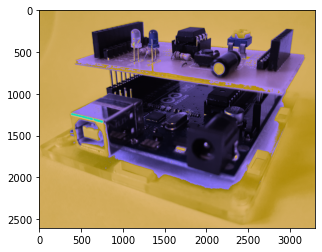

In [18]:
# Matríz de 3x3 con número aleatorios
matrix = np.random.rand(3, 3)

img_random = np.matmul(im_matrix.reshape((-1,3)), matrix.T).reshape(im_matrix.shape)

print("Matríz generada:\n")
print(matrix, '\n')
plt.imshow(img_random.astype('uint8'))
plt.show()

### 8.4. Cambio de canales

Mediante la analogía vista, ahora se intercambian los canales RGB de la siguiente manera:

* R -> G
* G -> B
* B -> R

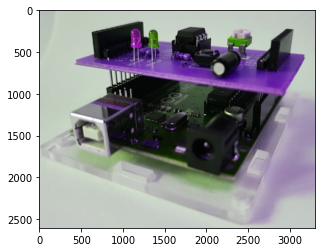

In [19]:
# [R]   [0, G, 0]
# [G] = [0, 0, B]
# [B]   [R, 0, 0]
matrix = np.array([[0, 1, 0],
                   [0, 0, 1],
                   [1, 0, 0]])

img_changed = np.matmul(im_matrix.reshape((-1,3)), matrix.T).reshape(im_matrix.shape)

plt.imshow(img_changed)
plt.show()

## Links de interés

* [Pillow(PIL) reference](https://pillow.readthedocs.io/en/stable/reference/Image.html): ejemplos y documentación de atributos, funciones, clases y constantes del modulo ***Image*** de la librería PIL.

* [Pillow tutorial](https://pillow.readthedocs.io/en/latest/handbook/tutorial.html): ejemplos usando la clase más popular de PIL: Image.

* [Manipulación de imagenes](https://programmerclick.com/article/8422482547/): ejemplos de procesamiento básico de imagenes con PIL y Matplotlib en Python.